In [6]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Data loading and exploration

In [7]:
collar = pd.read_csv('data/collar_BABBITT.csv')
print(collar.shape)
collar.head()

(399, 4)


,BHID,XCOLLAR,YCOLLAR,ZCOLLAR
0,34873,2296021.09,414095.85,1590.0
1,B1-001,2294148.20,420495.90,1620.9
2,B1-002,2296769.50,422333.50,1553.0
3,B1-003,2297820.11,423647.40,1565.0
4,B1-004,2298789.91,424357.51,1544.0


In [8]:
### Check how many unique BHID in collar dataset
len(set(collar['BHID']))

399

In [9]:
survey = pd.read_csv('data/survey_BABBITT.csv')
print(survey.shape)
survey.head()

(2628, 4)


,BHID,AT,AZ,DIP
0,34873,0.0,0,90.0
1,B1-001,0.0,327,60.0
2,B1-002,0.0,327,60.0
3,B1-002,453.0,327,60.0
4,B1-003,0.0,327,45.0


In [10]:
len(set(survey['BHID']))

399

In [11]:
assay  = pd.read_csv('data/assay_BABBITT.csv')
print(assay.shape)
assay.head()

(35616, 7)


,BHID,FROM,TO,CU,NI,S,FE
0,34873,0.0,2515.0,NaN,NaN,NaN,NaN
1,34873,2515.0,2517.4,0.03,0.08,NaN,NaN
2,34873,2517.4,2518.9,0.04,0.10,NaN,NaN
3,34873,2518.9,2524.0,0.41,0.18,NaN,NaN
4,34873,2524.0,2524.9,0.23,0.17,NaN,NaN


In [12]:
len(set(assay['BHID']))

399

# Merge 3 dataset together using BHID as key
### Using assay as master table (because having the most records)
* Step 1: left join survey to assay table
* Step 2: left join collar table to the step 1 output
### left join function: pd.merge(left_table, right_table, how='left', on=key)

In [13]:
merge1 = pd.merge(assay, survey, how='left', on='BHID')
merge2 = pd.merge(merge1, collar, how='left', on='BHID')

In [16]:
print(merge2.shape)
merge2.head(10)

(281708, 13)


,BHID,FROM,TO,CU,NI,S,FE,AT,AZ,DIP,XCOLLAR,YCOLLAR,ZCOLLAR
0,34873,0.0,2515.0,NaN,NaN,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
1,34873,2515.0,2517.4,0.03,0.08,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
2,34873,2517.4,2518.9,0.04,0.10,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
3,34873,2518.9,2524.0,0.41,0.18,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
4,34873,2524.0,2524.9,0.23,0.17,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
5,34873,2524.9,2535.0,0.16,0.16,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
6,34873,2535.0,2545.0,0.34,0.20,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
7,34873,2545.0,2557.2,0.34,0.14,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
8,34873,2557.2,2562.7,0.16,0.10,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
9,34873,2562.7,2565.0,0.20,0.10,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0


In [20]:
merge2.columns

Index(['BHID', 'FROM', 'TO', 'CU', 'NI', 'S', 'FE', 'AT', 'AZ', 'DIP',
       'XCOLLAR', 'YCOLLAR', 'ZCOLLAR'],
      dtype='object')

## Modelling

In [28]:
select = merge2[~pd.isnull(merge2['CU'])]

In [30]:
select.head(100)

,BHID,FROM,TO,CU,NI,S,FE,AT,AZ,DIP,XCOLLAR,YCOLLAR,ZCOLLAR
1,34873,2515.0,2517.4,0.03,0.08,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
2,34873,2517.4,2518.9,0.04,0.10,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
3,34873,2518.9,2524.0,0.41,0.18,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
4,34873,2524.0,2524.9,0.23,0.17,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
5,34873,2524.9,2535.0,0.16,0.16,NaN,NaN,0.0,0,90.0,2296021.09,414095.85,1590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,B1-002,220.0,225.0,0.07,0.05,NaN,NaN,453.0,327,60.0,2296769.50,422333.50,1553.0
119,B1-002,240.0,245.0,0.07,0.05,NaN,NaN,0.0,327,60.0,2296769.50,422333.50,1553.0
120,B1-002,240.0,245.0,0.07,0.05,NaN,NaN,453.0,327,60.0,2296769.50,422333.50,1553.0
123,B1-002,260.0,265.0,0.07,0.03,NaN,NaN,0.0,327,60.0,2296769.50,422333.50,1553.0


In [22]:
# select non-missing columns, 
select = merge2[~pd.isnull(merge2['CU'])]

In [23]:
from sklearn.model_selection import train_test_split

Features = select[['FROM', 'TO', 'AT', 'AZ', 'DIP',
       'XCOLLAR', 'YCOLLAR', 'ZCOLLAR']]

Label = select['CU']

#Use the sklearn.model_selection split
x_train, x_val, y_train, y_val = train_test_split(Features, Label, test_size=0.2, random_state=42)

# Lets see how it looks like! 
print(x_train.shape)
print(x_val.shape)

(142939, 8)
(35735, 8)


In [26]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# !pip3 install lightgbm

In [35]:
model_cu=xgb.XGBRegressor(
    max_depth = 3,             ## useful
    learning_rate = 0.1,       ## useful
    gamma = 10.0, 
    min_child_weight = 0.0,
    max_delta_step = 0.0, 
    subsample = 0.75, 
    colsample_bytree = 0.75, 
    colsample_bylevel = 1.0, 
    reg_alpha = 10, 
    reg_lambda = 10, 
    n_estimator= 150,          ## useful, 150, 200, 250, 
    silent = 0, 
    nthread = 4, 
    scale_pos_weight = 1.0, 
    seed = 424,
    missing = None
)

eval_set = [(x_train, y_train), (x_val, y_val)]
model.fit(x_train, y_train, eval_metric = ["rmse"], eval_set = eval_set, verbose = True)

[14:03:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.67228	validation_1-rmse:0.720688
[1]	validation_0-rmse:0.639268	validation_1-rmse:0.684117
[2]	validation_0-rmse:0.612364	validation_1-rmse:0.654702
[3]	validation_0-rmse:0.587892	validation_1-rmse:0.627468
[4]	validation_0-rmse:0.568029	validation_1-rmse:0.606714
[5]	validation_0-rmse:0.546015	validation_1-rmse:0.58275
[6]	validation_0-rmse:0.530726	validation_1-rmse:0.567711
[7]	validation_0-rmse:0.515043	validation_1-rmse:0.54924
[8]	validation_0-rmse:0.503943	validation_1-rmse:0.539012
[9]	validation_0-rmse:0.490553	validation_1-rmse:0.523617
[10]	validation_0-rmse:0.47925	validation_1-rmse:0.509993
[11]	validation_0-rmse:0.467608	validation_1-rmse:0.497452
[12]	validation_0-rmse:0.456974	validation_1-rmse:0.486147
[13]	validation_0-rmse:0.447639	validation_1-rmse:0.47472
[14]	validation_0-rmse:0.446824	validation_1-rmse:0.473651
[15]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=0.75, gamma=10.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0.0,
             max_depth=10, min_child_weight=0.0, missing=None, n_estimator=1200,
             n_estimators=100, n_jobs=1, nthread=4, objective='reg:linear',
             random_state=0, reg_alpha=10, reg_lambda=10, scale_pos_weight=1.0,
             seed=424, silent=0, subsample=0.75, verbosity=1)

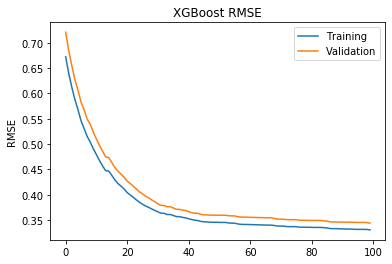

Last round training RMSE:  0.330726
Last round validation RMSE:  0.344036


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fix, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label = 'Training')
ax.plot(x_axis, results['validation_1']['rmse'], label = 'Validation')

ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

print('Last round training RMSE: ', results['validation_0']['rmse'][len(results['validation_0']['rmse']) - 1])
print('Last round validation RMSE: ', results['validation_1']['rmse'][len(results['validation_1']['rmse']) - 1])

In [31]:
# xgboost, random forest, GBM, Logistic Regression

In [ ]:
[1, 2, 0.5, 0.6, 0.8, 'XCOLLAR', 'YCOLLAR', 'ZCOLLAR']

In [ ]:
pred_cu = model_cu.predict([1, 2, 0.5, 0.6, 0.8, 'XCOLLAR', 'YCOLLAR', 'ZCOLLAR'])
pred_ni = model_ni.predict([1, 2, 0.5, 0.6, 0.8, 'XCOLLAR', 'YCOLLAR', 'ZCOLLAR'])
pred_s
pred_fe